In [13]:
using Unitful
using Common
using UPhysConst
import PyPlot as pl

┌ Info: Precompiling Common [top-level]
└ @ Base loading.jl:1664


In [14]:
Sc  = solar_const   
Sd  = sun_earth_distance
SR  = sun_radius       
TS  = sun_surface_temp

5.77800e+03 K

In [15]:
sun_total_radiated_power = u_σ * TS^4 * 4.0 * pi * SR^2
solar_constant = u_σ * TS^4 *  SR^2 / Sd^2 

1.36932e+03 W m^-2

In [16]:
"""
    Radiation density [W m^{-3}] J/s / m²  (1/m)

    λ {float} -- wavelength
    T {float} -- temperature
    float -- power / per area / per wavelength interval
"""
function  PlanckLaw(λ, T)
    x = @. u_h * u_c / (u_kB * T * λ)
    U = @. 2.0 * π  * u_h * u_c^2 / λ^5 / (exp(x) - 1.0)
    U
end

PlanckLaw

In [17]:
println("PS    = ", sun_total_radiated_power)
println("PS/m² = ", u_σ * TS)
println("Sc    = ", Sc)
println("Sc2   = ", solar_constant)

PS    = 3.85103e+26 W
PS/m² = 3.27634e-04 W K^-3 m^-2
Sc    = 1.36700e+03 W m^-2
Sc2   = 1.36932e+03 W m^-2


In [18]:
λ1   = linspace(1.0e-8,5.0e-6,20000) * u"m"
Δλ1  = λ1[2] - λ1[1]
US   = PlanckLaw(λ1, TS) * SR^2 / Sd^2
λ2   = linspace(1.0e-8,8.0e-5,20000) * u"m"
Δλ2  = λ2[2] - λ2[1]
UIR = PlanckLaw(λ2, 288.0*u"K")

println("sum(US) * Δλ = ", sum(US) * Δλ1)
println("sum(UIR)* Δλ = ", sum(UIR) * Δλ2)

sum(US) * Δλ = 1.36215e+03 J m^-2 s^-1
sum(UIR)* Δλ = 3.86276e+02 J m^-2 s^-1


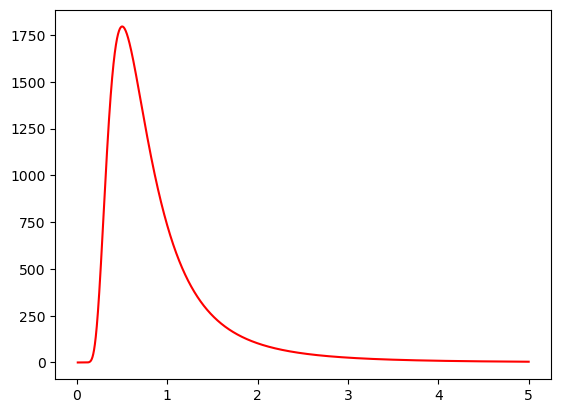

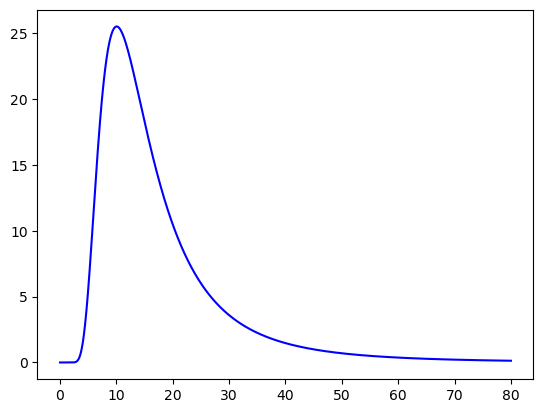

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f38ef64d5a0>

In [19]:
λ1m  = [x.val for x in λ1]
λ2m  = [x.val for x in λ2]
USm  = [x.val for x in US]
UIRm = [x.val for x in UIR]
pl.plot(λ1m*1.0e6, USm*1.0e-6, "r")
pl.figure()
pl.plot(λ2m*1.0e6, UIRm*1.0e-6,"b")

<div> <img src="figures/energy_balance_detailed.png" width=400> </div>

## Intensity balance
(1) $(1-u) I_s - I_e + I_l = 0$

(2) $I_s - I_l - (1-v) I_e = 0$

Transform (1):   
$I_l = I_e - (1-u) I_s$

Insert into (2):   
$I_s - (I_e - (1-u) I_s) - (1-v) I_e = 0$


$I_s + (1-u) I_s = I_e + (1-v) I_e$

$(2-u) I_s = (2-v) I_e$

$I_e = I_s \dfrac{2-u}{2-v}$

With (1):   
$I_l = I_s \left(\dfrac{2-u}{2-v} - (1-u)\right)$


In [24]:
u  = 0.3
v  = linspace(0.0, 1.0, 100)
Is = @. Sc/4.0
Ie = @. Is * (2.0-u)/(2.0-v)
Il = @. Is * ((2.0-u)/(2.0-v) - (1-u));

vIe = uval(Ie)
vIl = uval(Il)

100-element Vector{Float64}:
 5.12625e+01
 5.27371e+01
 5.42267e+01
 5.57315e+01
 5.72519e+01
 5.87881e+01
 6.03402e+01
 6.19086e+01
 6.34936e+01
 6.50952e+01
 6.67140e+01
 6.83500e+01
 7.00036e+01
 ⋮
 2.83652e+02
 2.88450e+02
 2.93335e+02
 2.98313e+02
 3.03384e+02
 3.08551e+02
 3.13819e+02
 3.19188e+02
 3.24662e+02
 3.30246e+02
 3.35940e+02
 3.41750e+02

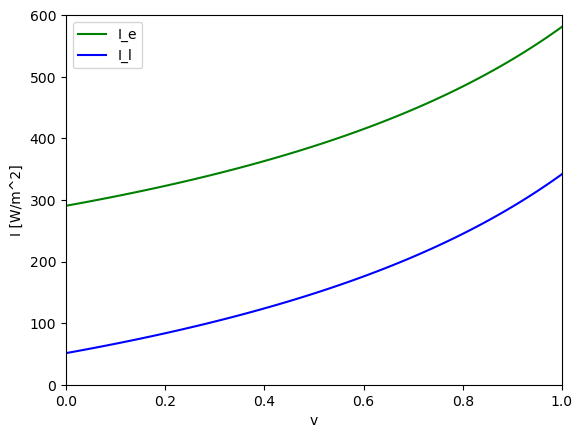

In [25]:
pl.plot(v, vIe, "g", label="I_e")
pl.plot(v, vIl, "b", label="I_l")
pl.xlabel("v")
pl.ylabel("I [W/m^2]")
pl.legend(loc="best")
pl.axis([0.0, 1.0, 0.0, 600.0])
pl.savefig("figures/I_vs_v.png")

In [26]:
Te = @. (vIe/u_σ)^(1/4)
Tl = @. (vIl/u_σ)^(1/4);

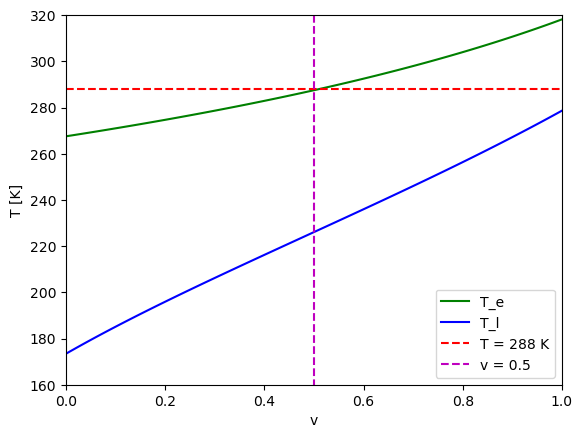

In [27]:
pl.plot(v, uval(Te), "g", label="T_e")
pl.plot(v, uval(Tl), "b", label="T_l")
pl.plot([0.0,1.0], [288.0, 288.0], "r--", label="T = 288 K")
pl.plot([0.5,0.5], [320.0, 160.0], "m--", label="v = 0.5")
pl.xlabel("v")
pl.ylabel("T [K]")
pl.legend(loc="best")
pl.axis([0.0, 1.0, 160, 320])
pl.savefig("figures/T_vs_v.png")